<a href="https://colab.research.google.com/github/tavaresgani/portfolio-dados-e-ml/blob/main/projetoTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#lendo o arquivo
titanic = pd.read_csv('titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#Calculando a probabilidade de sobrevivência pelo sexo
titanic[['Sex', 'Survived']].groupby(['Sex']).mean() * 100

,Survived
Sex,
female,74.203822
male,18.890815


In [4]:
#Calculando a probabilidade de sobrevivência de acordo com classe
titanic[['Pclass', 'Survived']].groupby(['Pclass']).mean() * 100

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


Text(0.5, 1.0, 'Taxa de sobrevivência por classe')

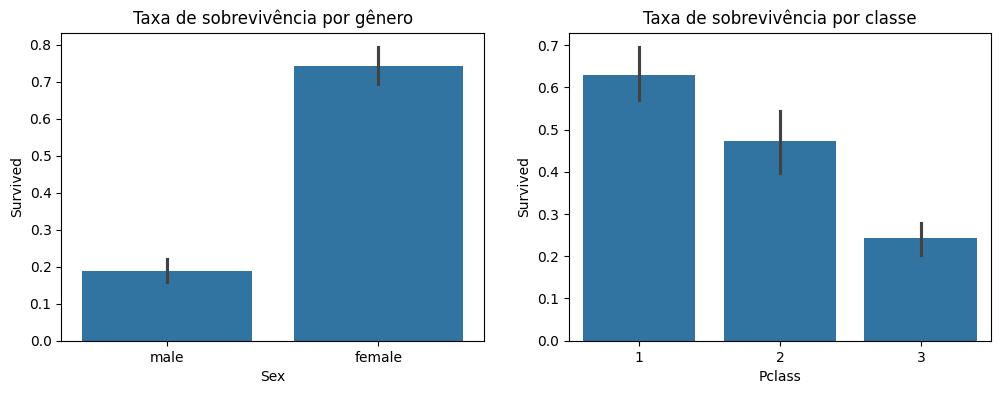

In [5]:
#Plotar os gráficos para Survived vs Sex, Pclass
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(12,4))


sns.barplot(x='Sex', y='Survived', data=titanic, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=titanic, ax=axis2)

#Adicionando titulo aos eixos
axis1.set_title('Taxa de sobrevivência por gênero')
axis2.set_title('Taxa de sobrevivência por classe')

<ipython-input-6-7f037a0f2601>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = titanic.groupby('AgeGroup')['Survived'].mean()


Text(0, 0.5, 'Taxa de Sobrevivência')

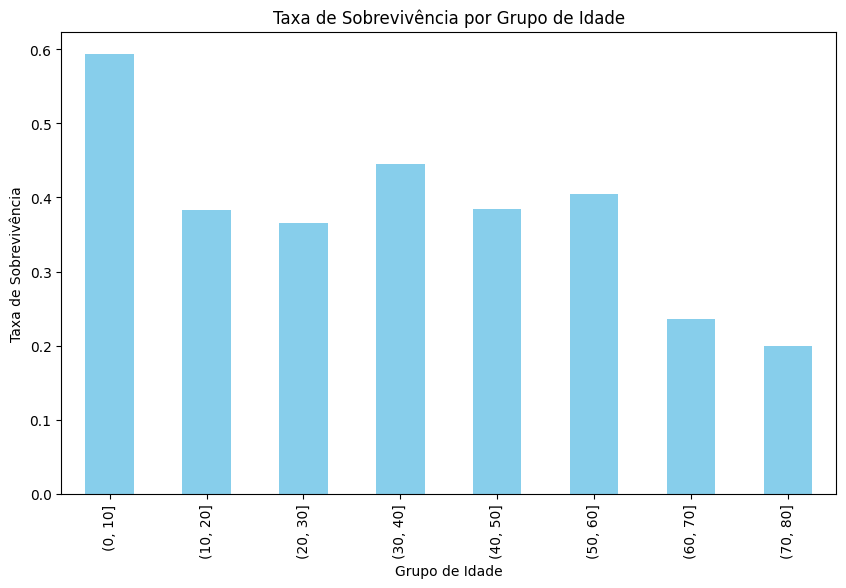

In [6]:
#Ver a influência da idade na taxa de probabilidade

# Criar intervalos de idade
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

# Adicionar uma nova coluna 'AgeGroup' ao DataFrame
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins)

# Calcular a taxa de sobrevivência média por grupo de idade
age_survival = titanic.groupby('AgeGroup')['Survived'].mean()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
age_survival.plot(kind='bar', color='skyblue')

# Adicionar título e rótulos aos eixos
plt.title('Taxa de Sobrevivência por Grupo de Idade')
plt.xlabel('Grupo de Idade')
plt.ylabel('Taxa de Sobrevivência')